## Imports

In [1]:
# IMPORTS
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

## Load Data

In [2]:
wingman_df = pd.read_csv('../raw_data/trimmed_data/wingman_data_cleaned.csv')

## Process

### HP & Power Columns

In [3]:
wingman_df.columns

Index(['id', 'eventsoe_no', 'far_part', 'acft_make', 'acft_model',
       'fixed_retractable', 'acft_category', 'homebuilt', 'flight_hours_mean',
       'crew_category', 'power_units', 'hp_or_lbs', 'dprt_time',
       'cert_max_gr_wt', 'afm_hrs', 'total_seats', 'num_eng', 'type_last_insp',
       'second_pilot', 'site_seeing', 'air_medical', 'crew_sex', 'certs_held',
       'dprt_apt_id', 'dest_apt_id', 'flt_plan_filed', 'pc_profession',
       'eng_type', 'carb_fuel_injection', 'type_fly', 'eng_mfgr'],
      dtype='object')

In [4]:
wingman_df['hp_or_lbs'].value_counts()

HP     16722
LBS      525
Name: hp_or_lbs, dtype: int64

In [5]:
wingman_df['hp_or_lbs'].isnull().sum()

1560

In [6]:
mask = wingman_df['hp_or_lbs'] == 'HP'

wingman_df = wingman_df[mask]

wingman_df.drop(columns=['hp_or_lbs'], axis=1, inplace=True)

<AxesSubplot: >

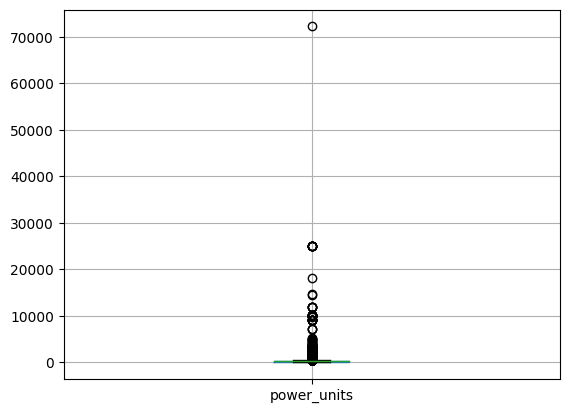

In [7]:
wingman_df.boxplot(column='power_units')

In [8]:
wingman_df['power_units'].describe()

count    16497.000000
mean       301.231921
std        946.124804
min          0.000000
25%        145.000000
50%        180.000000
75%        300.000000
max      72195.000000
Name: power_units, dtype: float64

In [9]:
wingman_df['power_units'].isnull().sum()

225

In [10]:
# Impute with median
wingman_df['power_units'].fillna(wingman_df['power_units'].median(), inplace=True)

### Misc

In [13]:
df = wingman_df.copy()

In [14]:
df['acft_make'] = wingman_df['acft_make'].astype('category')

In [15]:
df["acft_make"].value_counts().head(25)

CESSNA                         3791
PIPER                          2244
BEECH                           746
Cessna                          717
Piper                           444
BELL                            341
ROBINSON HELICOPTER             200
MOONEY                          182
CIRRUS DESIGN CORP              175
AIR TRACTOR INC                 173
Beech                           165
ROBINSON HELICOPTER COMPANY     148
BELLANCA                        141
MAULE                           131
AERONCA                         124
BOEING                          115
HUGHES                           99
EUROCOPTER                       86
LUSCOMBE                         85
Robinson                         84
STINSON                          83
DEHAVILLAND                      79
CHAMPION                         76
NORTH AMERICAN                   68
AVIAT AIRCRAFT INC               67
Name: acft_make, dtype: int64

In [16]:
counts = df["acft_make"].value_counts(normalize=True)
counts

CESSNA                         0.226707
PIPER                          0.134194
BEECH                          0.044612
Cessna                         0.042878
Piper                          0.026552
                                 ...   
HALL JEFFREY                   0.000060
HALL STEVEN C                  0.000060
HALL TERRENCE / HALL CATHIE    0.000060
HALL THOMAS K                  0.000060
 WSK PZL MIELEC                0.000060
Name: acft_make, Length: 3002, dtype: float64

In [17]:
majority_counts = counts[counts.cumsum() <= 0.55]
majority_counts

CESSNA                 0.226707
PIPER                  0.134194
BEECH                  0.044612
Cessna                 0.042878
Piper                  0.026552
BELL                   0.020392
ROBINSON HELICOPTER    0.011960
MOONEY                 0.010884
CIRRUS DESIGN CORP     0.010465
AIR TRACTOR INC        0.010346
Beech                  0.009867
Name: acft_make, dtype: float64